In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from zipfile import ZipFile
from glob import glob
from pathlib import Path
from PIL import Image
from collections import Counter
from tqdm import tqdm


In [2]:
path_disk = "/home/joan_ds/Sandbox/UOC/TFM/data/solocator"
images_folder_path = Path('/'.join([path_disk, 'photos']))
print(images_folder_path)

images_folder_path.mkdir(parents=True, exist_ok=True)

/home/joan_ds/Sandbox/UOC/TFM/data/solocator/photos


In [ ]:
path_hdd = '/media/joan_ds/Seagate Portable Drive/dades/solocator'

for zips in tqdm(glob('/'.join([path_hdd, '*.zip']))):
    #print(zips)
    with ZipFile(zips) as z_object:
        for file_info in z_object.infolist():
            if file_info.filename.endswith('.jpg'):
                z_object.extract(file_info, images_folder_path)


100%|██████████| 46/46 [06:11<00:00,  8.07s/it]


In [3]:
print(sum(1 for _ in glob('/'.join([str(images_folder_path), '*.*']))))

3216


In [12]:
def metadata_generator_img(image, id: str):

    size_image = os.path.getsize(image)
    size_image = round((size_image / 1024) / 1024, 3)
    
    with Image.open(image) as img:
            
        width, height = img.size
    
    dicc = {'id': id, 'path': image, 'dims': f"{width}x{height}",
            'width': width, 'height': height, 'size': size_image}

    return dicc


In [13]:
regex_timestamp = r'([0-9]{4}-[0-9]{2}-[0-9]{2}-[0-9]{2}-[0-9]{2}-[0-9]{2})|([0-9]{4}-[0-9]{2}-[0-9]{2};[0-9]{2}-[0-9]{2}-[0-9]{2})'

lst_dicc = []

for dirpath, _, filenames in os.walk(images_folder_path):
                     
    for file in filenames:
        timestamp = re.search(regex_timestamp, file).group(0)
        timestamp = timestamp.replace(";", "-")
        new_file = timestamp + '.jpg'
        os.rename(os.path.join(dirpath, file), os.path.join(dirpath, new_file))

        image = os.path.abspath(os.path.join(dirpath, new_file))
        dicc = metadata_generator_img(image, timestamp)
        lst_dicc.append(dicc)


In [14]:
images_df = pd.DataFrame.from_dict(lst_dicc)

images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3216 non-null   object 
 1   path    3216 non-null   object 
 2   dims    3216 non-null   object 
 3   width   3216 non-null   int64  
 4   height  3216 non-null   int64  
 5   size    3216 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 150.9+ KB


In [15]:
images_df.head()

,id,path,dims,width,height,size
0,2024-01-28-13-02-48,/home/joan_ds/Sandbox/UOC/TFM/data/solocator/p...,2992x4000,2992,4000,5.890
1,2025-04-08-20-47-04,/home/joan_ds/Sandbox/UOC/TFM/data/solocator/p...,2992x4000,2992,4000,4.453
2,2025-04-18-20-41-27,/home/joan_ds/Sandbox/UOC/TFM/data/solocator/p...,2992x4000,2992,4000,3.812
3,2024-03-24-07-17-48,/home/joan_ds/Sandbox/UOC/TFM/data/solocator/p...,2992x4000,2992,4000,6.918
4,2023-11-19-16-19-32,/home/joan_ds/Sandbox/UOC/TFM/data/solocator/p...,720x1280,720,1280,0.553


In [11]:
sample_images = []

for dim in list(set(images_df.dims)):
    print(dim)
    mask = images_df.dims == dim
    df_ = images_df[mask]
    path_image = df_.sample(1)
    sample_images.append(list(path_image.paths_images)[0])

1080x720
4000x2992
720x1280
2992x4000
1280x720
720x1080


In [12]:
sample_images

['/home/joan_ds/Sandbox/UOC/TFM/data/solocator/photos/2023-06-22-13-57-03.jpg',
 '/home/joan_ds/Sandbox/UOC/TFM/data/solocator/photos/2024-07-28-09-54-22.jpg',
 '/home/joan_ds/Sandbox/UOC/TFM/data/solocator/photos/2023-11-26-14-39-46.jpg',
 '/home/joan_ds/Sandbox/UOC/TFM/data/solocator/photos/2025-05-10-09-48-38.jpg',
 '/home/joan_ds/Sandbox/UOC/TFM/data/solocator/photos/2023-09-04-08-12-25.jpg',
 '/home/joan_ds/Sandbox/UOC/TFM/data/solocator/photos/2023-06-22-13-52-10.jpg']

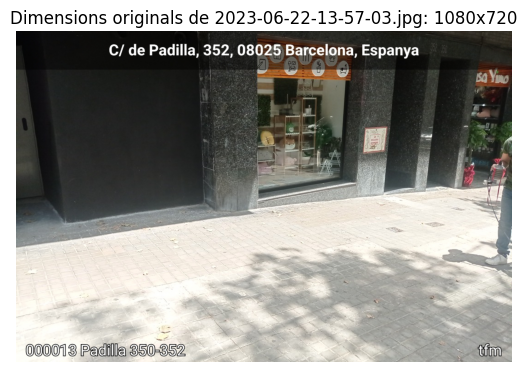

Imatge retallada guardada a /home/joan_ds/Sandbox/UOC/TFM/trials_imgs/


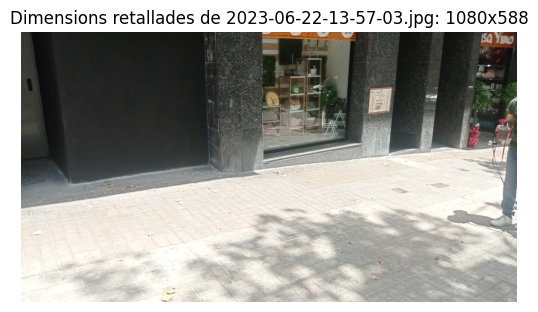

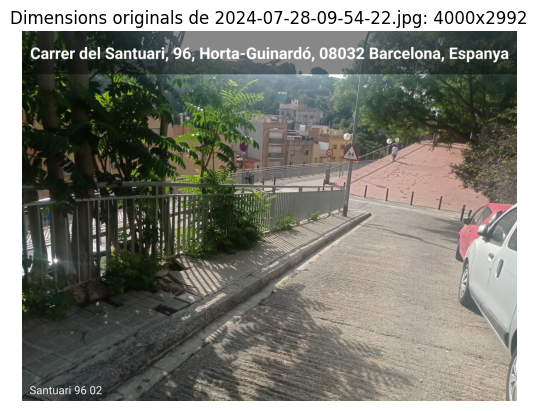

Imatge retallada guardada a /home/joan_ds/Sandbox/UOC/TFM/trials_imgs/


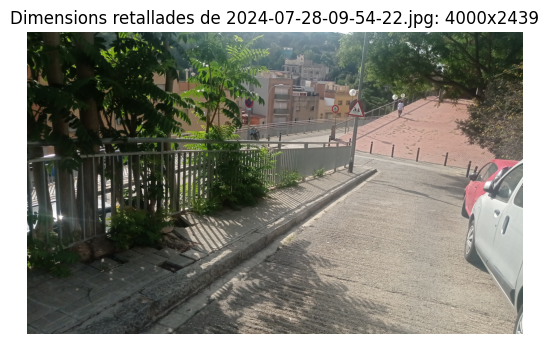

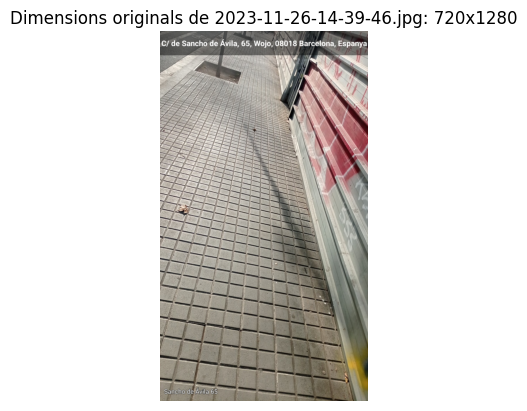

Imatge retallada guardada a /home/joan_ds/Sandbox/UOC/TFM/trials_imgs/


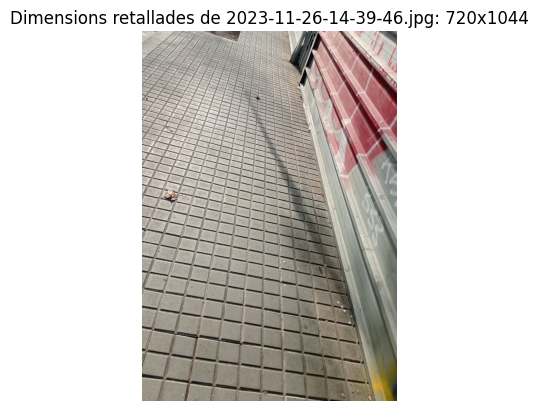

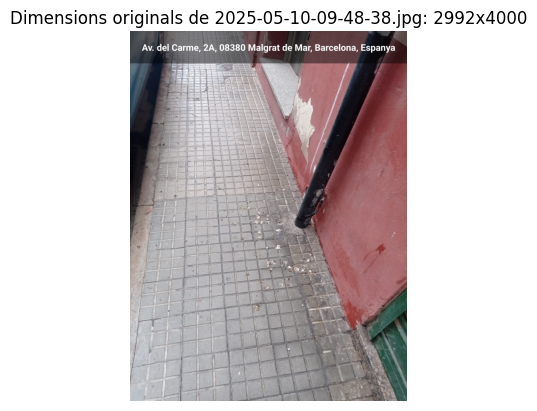

Imatge retallada guardada a /home/joan_ds/Sandbox/UOC/TFM/trials_imgs/


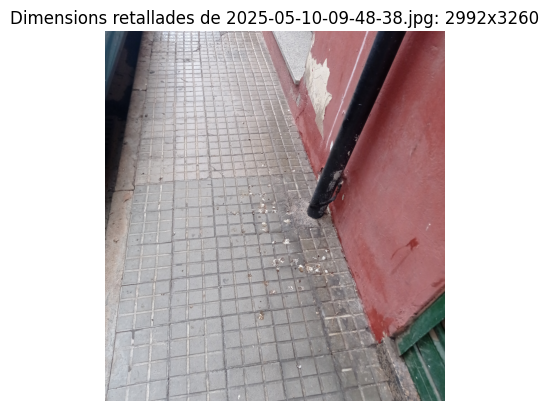

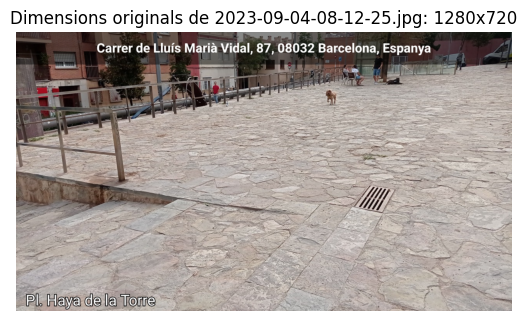

Imatge retallada guardada a /home/joan_ds/Sandbox/UOC/TFM/trials_imgs/


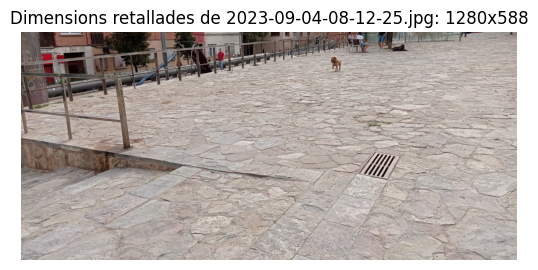

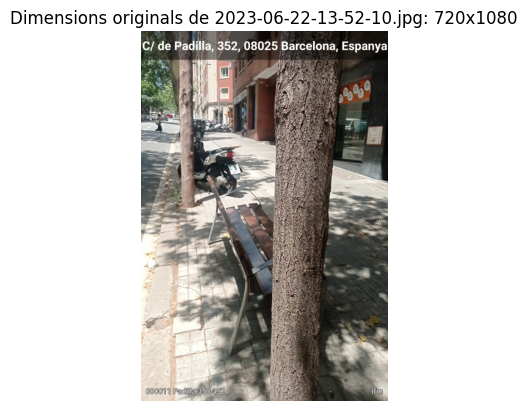

Imatge retallada guardada a /home/joan_ds/Sandbox/UOC/TFM/trials_imgs/


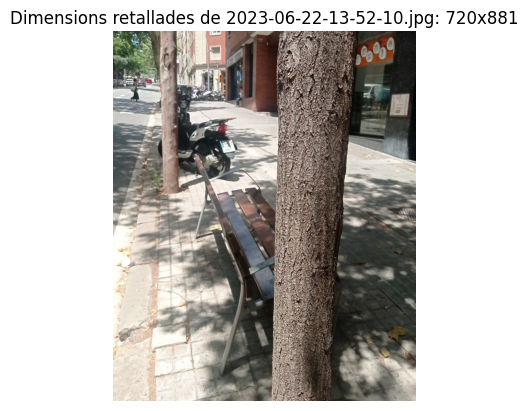

In [13]:
# Ruta on guardar la imatge retallada
output_folder = '/home/joan_ds/Sandbox/UOC/TFM/trials_imgs/'



for input_path in sample_images:

    filename = input_path.rsplit("/")[-1]
    with Image.open(input_path) as img:
        width, height = img.size
        crop_top = int(height * 0.12)     
        crop_bottom = int(height * 0.065)  
    
        # Definim la nova caixa de retall
        left = 0
        top = crop_top
        right = width
        bottom = height - crop_bottom
        img_cropped = img.crop((left, top, right, bottom))
        new_path = output_folder + filename
    
    # Guardem la imatge retallada
        img_cropped.save(new_path)
        plt.imshow(img)
        plt.title(f"Dimensions originals de {filename}: {width}x{height}")
        plt.axis("off")
        plt.show()

        print(f"Imatge retallada guardada a {output_folder}")
        width, height = img_cropped.size
        plt.imshow(img_cropped)        

        plt.title(f"Dimensions retallades de {filename}: {width}x{height}")
        plt.axis("off")
        plt.show()

In [14]:
output_folder = '/home/joan_ds/Sandbox/UOC/TFM/data/images/'

for input_path in tqdm(paths_images, desc="Retallant imatges"):

    filename = input_path.rsplit("/")[-1]
    with Image.open(input_path) as img:
        width, height = img.size
        crop_top = int(height * 0.12)     
        crop_bottom = int(height * 0.065)  
    
        # Definim la nova caixa de retall
        left = 0
        top = crop_top
        right = width
        bottom = height - crop_bottom
        img_cropped = img.crop((left, top, right, bottom))
        new_path = output_folder + filename
    
    # Guardem la imatge retallada
        img_cropped.save(new_path)

Retallant imatges: 100%|██████████| 3216/3216 [03:00<00:00, 17.81it/s]
